imports

In [1]:
root = "/Users/karolinanowacka/Desktop/ML projects/SOLVRO/intro_task/MNIST_tripplet_loss"
import torch as torch
import matplotlib.pyplot as plt
from torchvision import datasets as dt
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import os
import random
import sys

loading data

In [2]:
train_data = dt.MNIST(
    root=root, 
    train=True, 
    download=True,
    transform=ToTensor()
    )

test_data = dt.MNIST(
    root=root, 
    train=False, 
    download=True,
    transform=ToTensor()
    )

data analysis

exploring initial rows

In [3]:
for i in range(5):
    print(train_data[i])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

inspecting data types and shapes

In [4]:
image, label = train_data[0]
print(f"image datatype: {type(image)}, shape: {image.shape} label datatype: {type(label)}")


image datatype: <class 'torch.Tensor'>, shape: torch.Size([1, 28, 28]) label datatype: <class 'int'>


density histogran of pixel values

In [5]:
import numpy as numpy

def intensity_histogram(img):
    histogram = numpy.histogram(img.numpy().flatten(), bins = 10, range=(0, 1))
    
    plt.figure(figsize=(8,8))
    plt.hist(img.numpy().flatten(), bins = 5, range=(0, 1), color='green', edgecolor='blue', alpha=0.5)
    plt.title('Intensity Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    return histogram

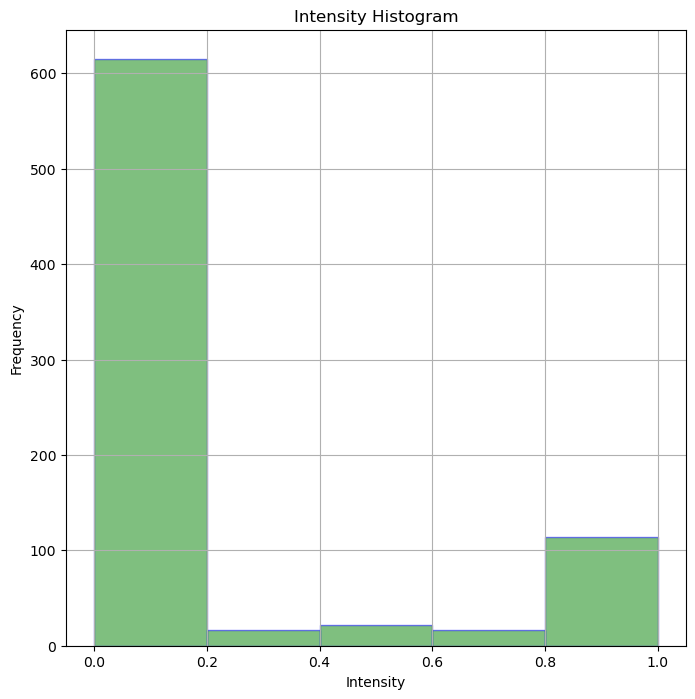

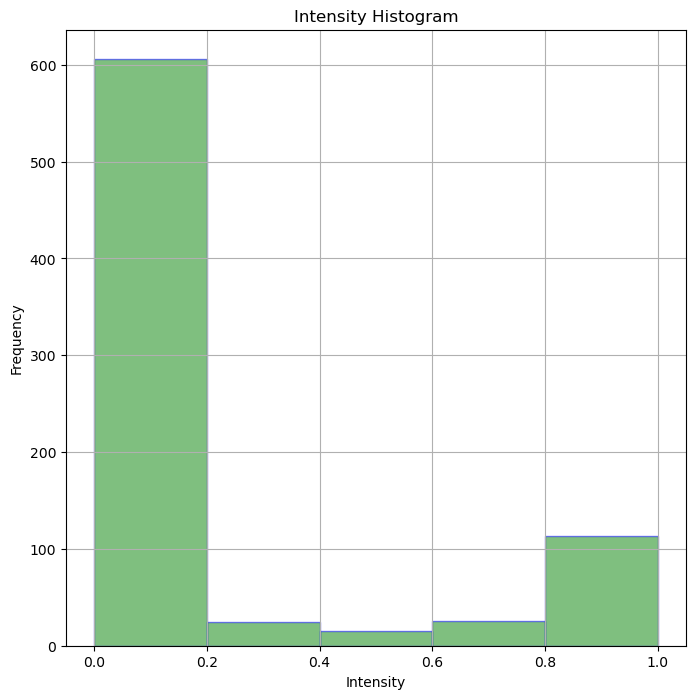

In [6]:
for i in range(2):
    seed = random.randint(0, len(train_data))
    image, label = train_data[seed]
    intensity_histogram(image)

upscaling

intensity histograms after upscaling